## Forecasting Honda Accord Sales (Adapted from Bertsimas 22.1)
Nearly all companies seek to accurately predict future sales of their product(s). If the company can accurately  predict sales before producing the product, then they can better match production with customer demand, thus reducing unnecessary inventory costs while being able to satisfy the demand for its product.
In this exercise, you are asked to predict the monthly sales in the United States of the Honda Accord automobile. Honda is a brand of Japanese automobiles that is now the seventh-largest automobile manufacturer in the world, and is consistently rated one of the top car manufacturers in the United States. The Accord is a car model of Honda that was first produced in 1981. It is one of Honda’s best-selling cars in the United States. We will use linear regression to predict monthly sales of the Accord using economic indicators of the United States as well as (normalized) Google search query volumes. The data for this problem is contained in the file Accord-242A-Spring24.csv. Each observation in the file is for a single month, from January 2014 through November 2023.

### a)
Start by splitting the data into a training set and a testing set. The training set should contain all observations from 2014 through 2018. The testing set should have all observations from January 2019 through November 2023.
Consider just the five independent variables Unemployment, AccordQueries, CPIEnergy, CPIAll and MilesTraveled. Using your regression skills, select a subset of these five variables and construct a regression model to predict monthly Accord sales (AccordSales). Try to choose which of the five variables to use in your model in order to build a high-quality linear regression model. Use the training set to build your model, and do not add any additional variables beyond the five indicated independent variables. Write a brief explanation (no more than one page, preferably less) – targeted to a statistically literate manager – describing how you decided on the variables to use in the model and the quality of the linear regression model’s predictions, as evaluated using the training set (there is no need to consider the test set for this part of the problem). Be sure to address the following in your explanation:


In [47]:
import numpy as np
import pandas as pd
import copy as cp
import matplotlib as plt

%matplotlib inline

In [48]:
Accord = pd.read_csv('Accord-242A-Spring24.csv')
Accord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthNumeric   119 non-null    int64  
 1   MonthFactor    119 non-null    object 
 2   Year           119 non-null    int64  
 3   AccordSales    119 non-null    int64  
 4   Unemployment   119 non-null    float64
 5   AccordQueries  119 non-null    int64  
 6   CPIAll         119 non-null    float64
 7   CPIEnergy      119 non-null    float64
 8   MilesTraveled  119 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 8.5+ KB


In [49]:
Accord.head(5)

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled
0,1,January,2014,20604,6.6,69,235.288,250.340,246531
1,2,February,2014,24622,6.7,74,235.547,249.925,249499
2,3,March,2014,33962,6.7,79,236.028,249.961,251120
3,4,April,2014,34124,6.2,74,236.468,249.864,251959
4,5,May,2014,39637,6.3,75,236.918,249.213,252289


In [50]:
Accord_train = Accord[Accord['Year'] <= 2018]
Accord_test = Accord[Accord['Year'] > 2018]

print('Training observation from 2014 - 2018:', len(Accord_train))
print('Testing observation from Jan 2018 - Nov 2023:', len(Accord_test))

Training observation from 2014 - 2018: 60
Testing observation from Jan 2018 - Nov 2023: 59


### Training the model
I will try the two ways of passing the data into the model:
1. Select the columns of interest that will constitute our matrices
2. Use syntaxis that follows R-style formulas

### 1) Traninig model (Matrix Style)

In [106]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm

# Choose the features to be used
cols = ['Unemployment', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']
X_train = Accord_train[cols]
y_train = Accord_train['AccordSales']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)
# X_train

In [107]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm

# Choose the features to be used
cols = ['Unemployment', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']
X_test = Accord_test[cols]
y_test = Accord_test['AccordSales']

# We must add an intercept as the standard model doesn't automatically fit one
X_test = sm.add_constant(X_test)
# X_test

In [53]:
# Fit the data to the model
model1 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.683
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00612
Time:                        13:38:47   Log-Likelihood:                -595.60
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      54   BIC:                             1216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.735e+05   1.49e+05      1.164

### 2) Traninig model (R - Style)

In [54]:
import statsmodels.formula.api as smf

ols1 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIAll + CPIEnergy + MilesTraveled',
                 data=Accord_train)
model1 = ols1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.683
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00612
Time:                        13:38:47   Log-Likelihood:                -595.60
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      54   BIC:                             1216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e+05   1.49e+05      1.164

### Variance Inflation Factor (VIF)

In [55]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['Unemployment', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']
VIF(Accord_train, cols)

Unemployment     31.683094
AccordQueries     1.939028
CPIAll           45.304922
CPIEnergy        12.340357
MilesTraveled    18.510210
dtype: float64

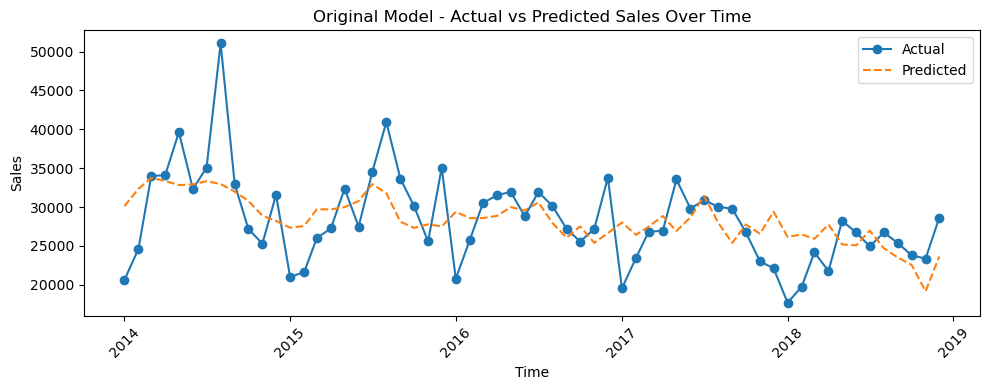

In [56]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model1.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, y_train, label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Original Model - Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Attempt to obtain a high-quality linear regresion - Step 1

After observing the values noted during lecture (R-square, P>|t|, and VIF) we can conclude that<br>
we can improve the model. The R-square model is extremelly low which indicates that we may be able to do better by removing the Unemployment variable since it shows values of:
1. P > | t |: 0.697 the highest value form all variables
2. VIF: 31.683094 > 10

### Removed Unemployment

In [57]:
# Removed Unemployment because of its high P>|t| and VIF

ols2 = smf.ols(formula='AccordSales ~ AccordQueries + CPIAll + CPIEnergy + MilesTraveled',
                 data=Accord_train)
model2 = ols2.fit()
print(model2.summary())

cols = ['AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']
VIF(Accord_train, cols)

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.636
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00269
Time:                        13:38:47   Log-Likelihood:                -595.69
No. Observations:                  60   AIC:                             1201.
Df Residuals:                      55   BIC:                             1212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.171e+05    3.8e+04      3.084

AccordQueries     1.918686
CPIAll           14.065391
CPIEnergy         4.634036
MilesTraveled    17.765021
dtype: float64

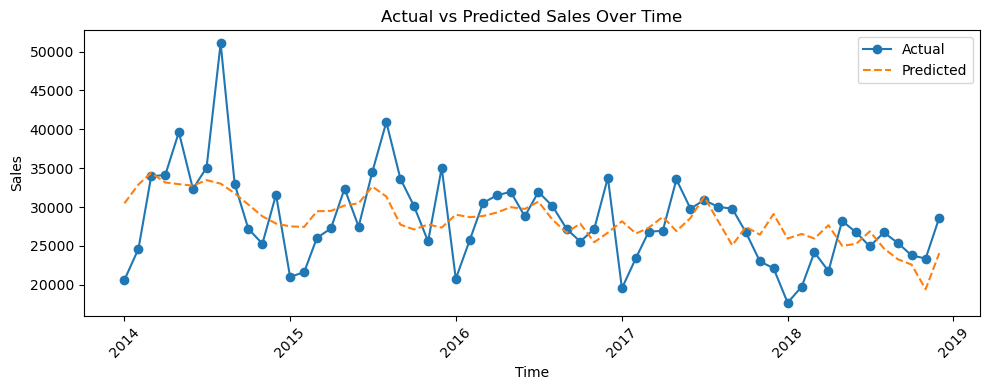

In [58]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model2.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, y_train, label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Attempt to obtain a high-quality linear regresion - Step 2

After removing the Unemployment variable the model R-square did not imporve, but the VIF values<br>
did imporved. Moving forward will remove the MilesTraveled variable since it might be highly correlated to the CPIAll, and I believe that the CPIAll is a better indicator for the number of cars sold than the Miles Travelled.

### Removed Unemployment and MilesTraveled

In [59]:
# Removed Unemployment because of its high P>|t| and VIF

ols3 = smf.ols(formula='AccordSales ~ AccordQueries + CPIAll + CPIEnergy',
                 data=Accord_train)
model3 = ols3.fit()
print(model3.summary())

cols = ['AccordQueries', 'CPIAll', 'CPIEnergy']
VIF(Accord_train, cols)

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.475
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00227
Time:                        13:38:47   Log-Likelihood:                -596.69
No. Observations:                  60   AIC:                             1201.
Df Residuals:                      56   BIC:                             1210.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.419e+05   3.36e+04      4.224

AccordQueries    1.899305
CPIAll           1.816792
CPIEnergy        1.075859
dtype: float64

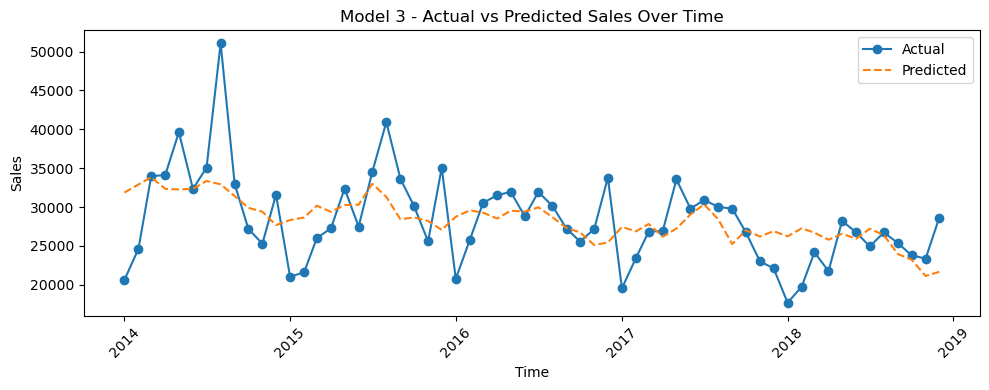

In [60]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model3.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, y_train, label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Model 3 - Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Removed Unemployment and CPIAll

In [61]:
# Removed Unemployment and CPIAll because of its high P>|t| and VIF

ols4 = smf.ols(formula='AccordSales ~ AccordQueries + CPIEnergy + MilesTraveled',
                 data=Accord_train)
model4 = ols4.fit()
print(model4.summary())

cols = ['AccordQueries', 'CPIEnergy', 'MilesTraveled']
VIF(Accord_train, cols)

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.482
Date:                Thu, 18 Jul 2024   Prob (F-statistic):             0.0217
Time:                        13:38:47   Log-Likelihood:                -599.28
No. Observations:                  60   AIC:                             1207.
Df Residuals:                      56   BIC:                             1215.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.32e+05   3.95e+04      3.342

AccordQueries    1.877821
CPIEnergy        1.311558
MilesTraveled    2.294664
dtype: float64

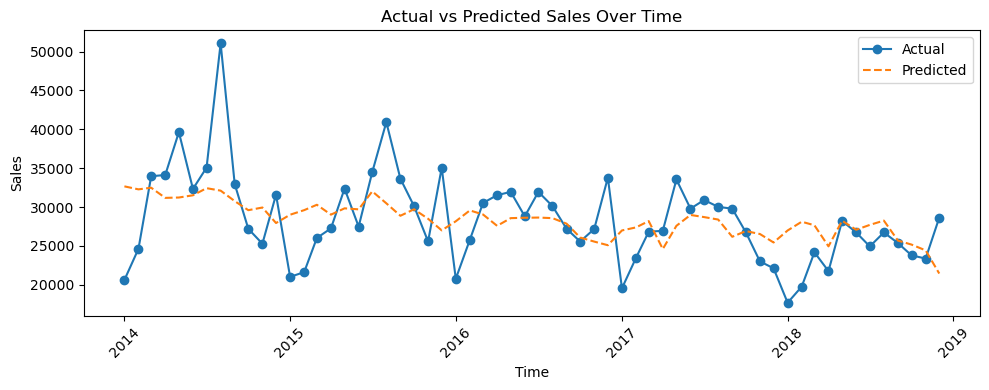

In [62]:
import matplotlib.pyplot as plt

# Predict values
y_pred = model4.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, y_train, label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Removed CPIAll

In [63]:
import statsmodels.formula.api as smf

ols5 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIEnergy + MilesTraveled',
                 data=Accord_train)
model5 = ols5.fit()
print(model5.summary())

cols = ['Unemployment', 'AccordQueries', 'CPIEnergy', 'MilesTraveled']
VIF(Accord_train, cols)

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.660
Date:                Thu, 18 Jul 2024   Prob (F-statistic):             0.0103
Time:                        13:38:47   Log-Likelihood:                -597.33
No. Observations:                  60   AIC:                             1205.
Df Residuals:                      55   BIC:                             1215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.448e+04   9.49e+04     -0.363

Unemployment      9.836351
AccordQueries     1.938995
CPIEnergy         1.312659
MilesTraveled    10.051510
dtype: float64

### Removed CPIAll and MilesTraveled

In [64]:
import statsmodels.formula.api as smf

ols6 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIEnergy',
                 data=Accord_train)
model6 = ols6.fit()
print(model6.summary())

cols = ['Unemployment', 'AccordQueries', 'CPIEnergy']
VIF(Accord_train, cols)

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     4.938
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00411
Time:                        13:38:47   Log-Likelihood:                -597.36
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      56   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9673.8804   1.44e+04     -0.672

Unemployment     2.245546
AccordQueries    1.891211
CPIEnergy        1.265462
dtype: float64

In [65]:
def OSR2(model, df_train, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
    return 1 - SSE/SST

print('OSR2 of the original model:')
OSR2(model1, Accord_train, Accord_test, 'AccordSales')

OSR2 of the original model:


-8.575864050460355

In [66]:
print('OSR2 of the removed Unemployment model:')
OSR2(model2, Accord_train, Accord_test, 'AccordSales')

OSR2 of the removed Unemployment model:


-4.63974958552716

In [67]:
print('OSR2 of the removed Unemployment and MilesTravelled model:')
OSR2(model3, Accord_train, Accord_test, 'AccordSales')

OSR2 of the removed Unemployment and MilesTravelled model:


0.2003077671374135

In [68]:
print('OSR2 of the removed Unemployment and CPIAll model:')
OSR2(model4, Accord_train, Accord_test, 'AccordSales')

OSR2 of the removed Unemployment and CPIAll model:


-0.48899599872983157

In [69]:
print('OSR2 of the removed CPIAll model:')
OSR2(model5, Accord_train, Accord_test, 'AccordSales')

OSR2 of the removed CPIAll model:


-0.7236549095135298

In [70]:
print('OSR2 of the removed CPIAll and MilesTraveled model:')
OSR2(model6, Accord_train, Accord_test, 'AccordSales')

OSR2 of the removed CPIAll and MilesTraveled model:


-0.7052227168849379

### b)
Let us now try to further improve the linear regression model by modeling sea- sonality. In predicting demand and sales, seasonality is often very important since demand for most products tends to be periodic in time. For example, demand for heavy jackets and coats tends to be higher in the winter, while demand for sunscreen tends to be higher in the summer.
Construct a new linear regression model using the MonthFactor variable as an independent variable, in addition to all five of the variables you used at the start of part (a). There is no need to do variable selection for this part of the problem. As before, construct your model based on the training data.

In [71]:
import statsmodels.formula.api as smf

ols7 = smf.ols(formula='AccordSales ~ MonthFactor + Unemployment + CPIAll + CPIEnergy + MilesTraveled',
                 data=Accord_train)
model7 = ols7.fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     8.711
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           8.74e-09
Time:                        13:38:47   Log-Likelihood:                -563.05
No. Observations:                  60   AIC:                             1158.
Df Residuals:                      44   BIC:                             1192.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

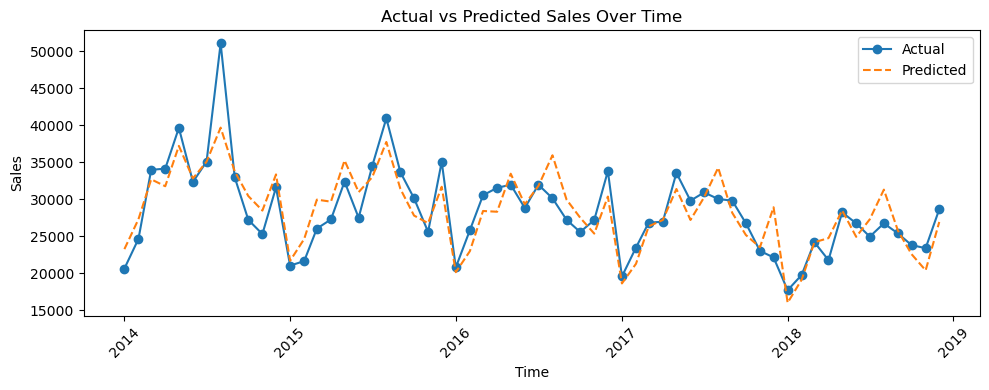

In [72]:
import matplotlib.pyplot as plt

# Add MonthFactor to X_train
X_train['MonthFactor'] = Accord_train['MonthFactor']

# Predict values
y_pred = model7.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, y_train, label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### c)

Build a final model using a subset of the independent variables used in parts (a) and (b), providing a brief justification for the variables selected. What is the training set R2? What is the OSR2 value for the testing set? Compare these two numbers and briefly analyze them. Please provide a plausible explanation for any significant differences you do or do not observe.

In [73]:
import statsmodels.formula.api as smf

ols8 = smf.ols(formula='AccordSales ~ MonthFactor + AccordQueries + CPIAll + CPIEnergy',
                 data=Accord_train)
model8 = ols8.fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     9.364
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           3.67e-09
Time:                        13:38:47   Log-Likelihood:                -563.48
No. Observations:                  60   AIC:                             1157.
Df Residuals:                      45   BIC:                             1188.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

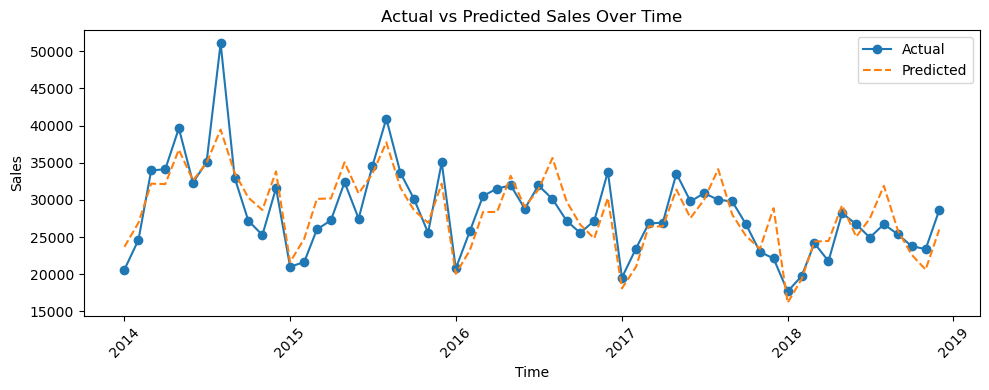

In [74]:
import matplotlib.pyplot as plt

# Add MonthFactor to X_train
X_train['MonthFactor'] = Accord_train['MonthFactor']

# Predict values
y_pred = model8.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, y_train, label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [75]:
print('OSR2 of the latest model is:')
OSR2(model8, Accord_train, Accord_test, 'AccordSales')

OSR2 of the latest model is:


0.47798623625642345

/var/folders/7h/qfqy_nr14yqgrd8r6g_7_fvr0000gn/T/ipykernel_81206/909792034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['MonthFactor'] = Accord_test['MonthFactor']


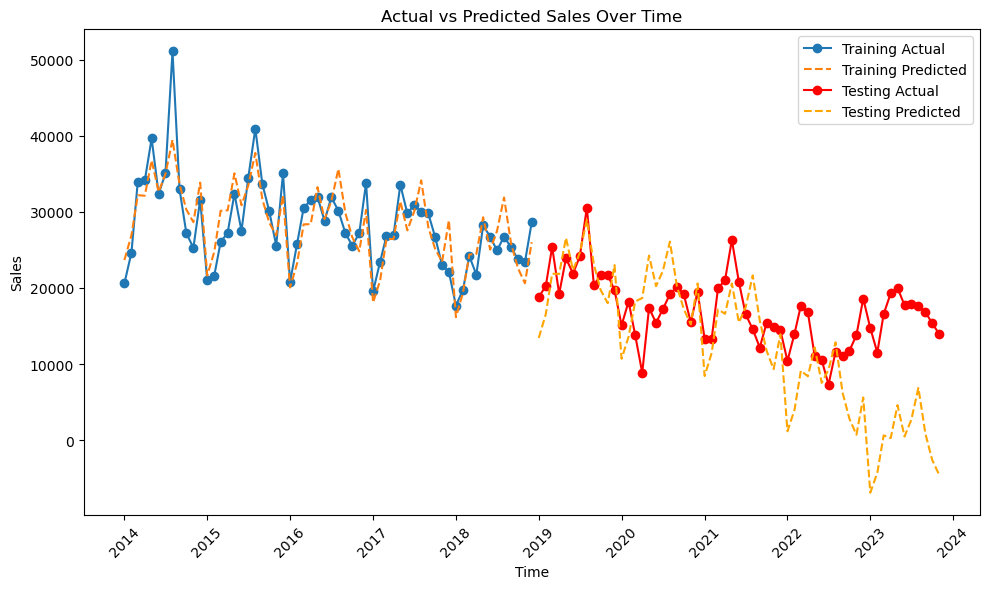

In [103]:
# Add MonthFactor to X_train
X_test['MonthFactor'] = Accord_test['MonthFactor']

# Concatenate the training and testing data along with their predictions
time_series_train = pd.to_datetime(Accord_train['Year'].astype(str) + '-' + Accord_train['MonthNumeric'].astype(str))
time_series_test = pd.to_datetime(Accord_test['Year'].astype(str) + '-' + Accord_test['MonthNumeric'].astype(str))

y_pred_train = model8.predict(X_train)
y_pred_test = model8.predict(X_test)

# Plot actual and predicted sales for both training and testing data
plt.figure(figsize=(10, 6))

# Training data
plt.plot(time_series_train, Accord_train['AccordSales'], label='Training Actual', marker='o')
plt.plot(time_series_train, y_pred_train, label='Training Predicted', linestyle='--')

# Testing data
plt.plot(time_series_test, Accord_test['AccordSales'], label='Testing Actual', marker='o', color='red')
plt.plot(time_series_test, y_pred_test, label='Testing Predicted', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### d)
Let us now consider adding an additional feature/variable to your final model from part (c). Based on your knowledge and intuition, think of a monthly variable that you hypothesize might be related to Honda sales. Provide a one or two-sentence explanation for your choice. Search online for a data source for your chosen variable (if you are not able to find data, then you need to pick a different variable), and append your collected data as a new column in the original data file. (It is OK to use variables similar to what we used above, i.e., a different economic indicator or Google trends data for a different search term, but feel free to get as creative as you like.)

Now, build a new regression model with your additional chosen feature in addition to the features that you selected in part (c). Does the new feature add any predictive value? Justify your answer based on the results of your analysis.

In [77]:
# Create a DataFrame for CCI values
cci_data = pd.DataFrame({
    'Month': pd.date_range(start='2014-01-01', end='2023-11-01', freq='MS'),
    'CCI': [99.6, 99.7, 99.8, 99.9, 99.9, 100.0, 99.9, 99.9, 99.9, 100.0, 100.1, 100.3,
            100.5, 100.6, 100.7, 100.7, 100.6, 100.6, 100.4, 100.4, 100.3, 100.4, 100.6,
            100.6, 100.5, 100.4, 100.4, 100.4, 100.4, 100.4, 100.3, 100.3, 100.4, 100.4,
            100.5, 100.5, 100.5, 100.5, 100.6, 100.7, 100.8, 100.8, 100.9, 100.9, 101.0,
            101.1, 101.1, 101.1, 101.1, 101.1, 101.1, 101.1, 101.1, 101.2, 101.2, 101.1,
            101.1, 101.0, 100.9, 100.8, 100.8, 100.8, 100.9, 100.9, 100.9, 100.8, 100.7,
            100.5, 100.5, 100.6, 100.7, 100.8, 100.7, 100.2, 99.2, 98.1, 97.7, 97.9, 98.2,
            98.4, 98.7, 98.7, 98.8, 98.9, 99.0, 99.3, 99.7, 100.0, 100.3, 100.5, 100.4,
            100.1, 99.9, 99.8, 99.5, 99.3, 99.0, 98.5, 97.9, 97.5, 97.2, 96.8, 96.6, 96.6,
            96.6, 96.7, 96.9, 97.2, 97.5, 97.7, 97.9, 98.1, 98.3, 98.5, 98.6, 98.5, 98.3,
            98.2, 98.0]
})

# Merge CCI data with the existing dataset based on the month
Accord['Month'] = pd.to_datetime(Accord['Year'].astype(str) + '-' + Accord['MonthNumeric'].astype(str))
Accord = pd.merge(Accord, cci_data, on='Month', how='left')

# Drop the 'Month' column if not needed
Accord = Accord.drop(columns=['Month'])

In [78]:
# Split the dataset into training and testing sets
Accord_train_data = Accord[Accord['Year'] <= 2018]
Accord_test_data = Accord[Accord['Year'] > 2018]

print('Training observation from 2014 - 2018:', len(Accord_train_data))
print('Testing observation from Jan 2018 - Nov 2023:', len(Accord_test_data))

Training observation from 2014 - 2018: 60
Testing observation from Jan 2018 - Nov 2023: 59


In [79]:
Accord_train_data.head(5)

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,CCI
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,99.6
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,99.7
2,3,March,2014,33962,6.7,79,236.028,249.961,251120,99.8
3,4,April,2014,34124,6.2,74,236.468,249.864,251959,99.9
4,5,May,2014,39637,6.3,75,236.918,249.213,252289,99.9


In [80]:
import statsmodels.formula.api as smf

ols9 = smf.ols(formula='AccordSales ~ MonthFactor + AccordQueries + CPIAll + CPIEnergy + CCI',
                 data=Accord_train_data)
model9 = ols9.fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     9.732
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           1.62e-09
Time:                        13:38:48   Log-Likelihood:                -560.52
No. Observations:                  60   AIC:                             1153.
Df Residuals:                      44   BIC:                             1187.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

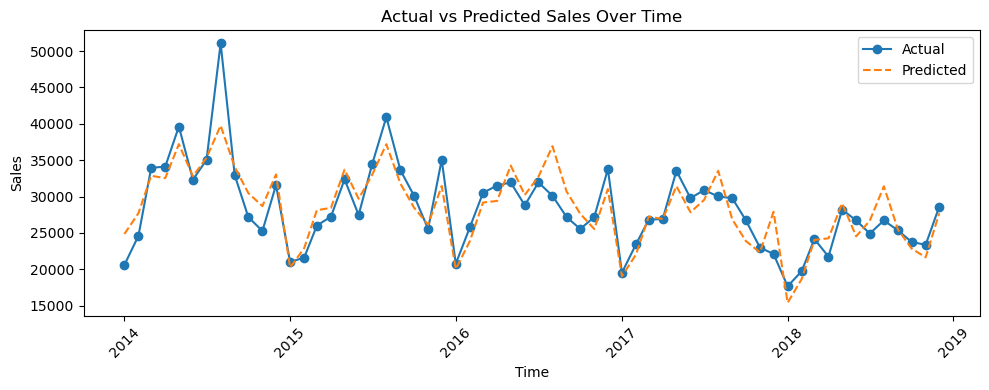

In [85]:
import matplotlib.pyplot as plt

# Make sure X_train includes all necessary variables, including 'CCI'
X_train = Accord_train_data[['MonthFactor', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'CCI']]
X_test = Accord_test_data[['MonthFactor', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'CCI']]

# Predict values
y_pred = model9.predict(X_train)

# Create a time series for x-axis
time_series = pd.to_datetime(Accord_train_data['Year'].astype(str) + '-' + Accord_train_data['MonthNumeric'].astype(str))

# Plot actual vs predicted over time
plt.figure(figsize=(10, 4))
plt.plot(time_series, Accord_train_data['AccordSales'], label='Actual', marker='o')
plt.plot(time_series, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [86]:
print('OSR2 of the latest model is:')
OSR2(model9, Accord_train_data, Accord_test_data, 'AccordSales')

OSR2 of the latest model is:


-0.2874704540480755

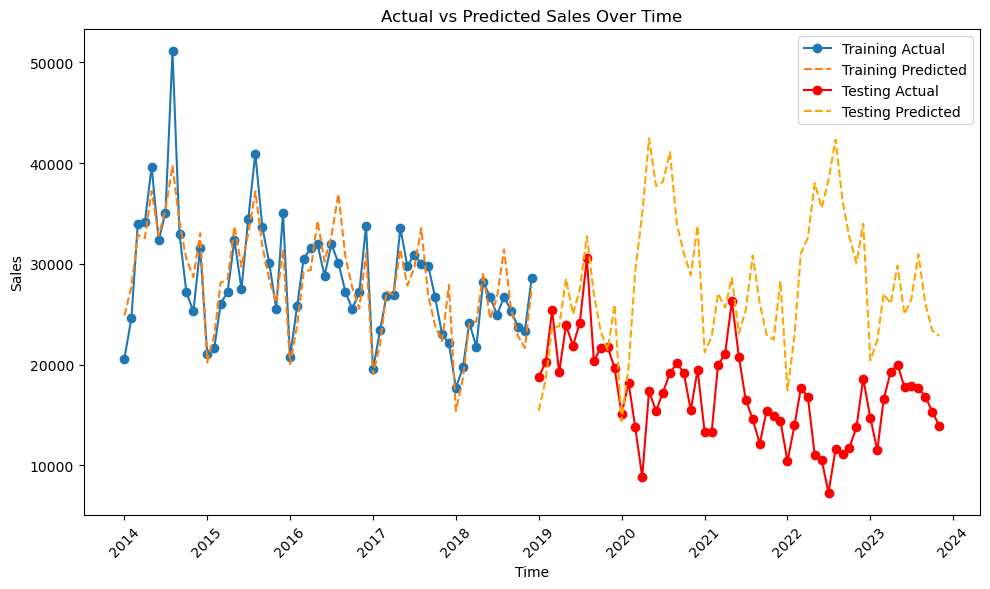

In [87]:
# Concatenate the training and testing data along with their predictions
time_series_train = pd.to_datetime(Accord_train_data['Year'].astype(str) + '-' + Accord_train_data['MonthNumeric'].astype(str))
time_series_test = pd.to_datetime(Accord_test_data['Year'].astype(str) + '-' + Accord_test_data['MonthNumeric'].astype(str))

y_pred_train = model9.predict(X_train)
y_pred_test = model9.predict(X_test)

# Plot actual and predicted sales for both training and testing data
plt.figure(figsize=(10, 6))

# Training data
plt.plot(time_series_train, Accord_train_data['AccordSales'], label='Training Actual', marker='o')
plt.plot(time_series_train, y_pred_train, label='Training Predicted', linestyle='--')

# Testing data
plt.plot(time_series_test, Accord_test_data['AccordSales'], label='Testing Actual', marker='o', color='red')
plt.plot(time_series_test, y_pred_test, label='Testing Predicted', linestyle='--', color='orange')

plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


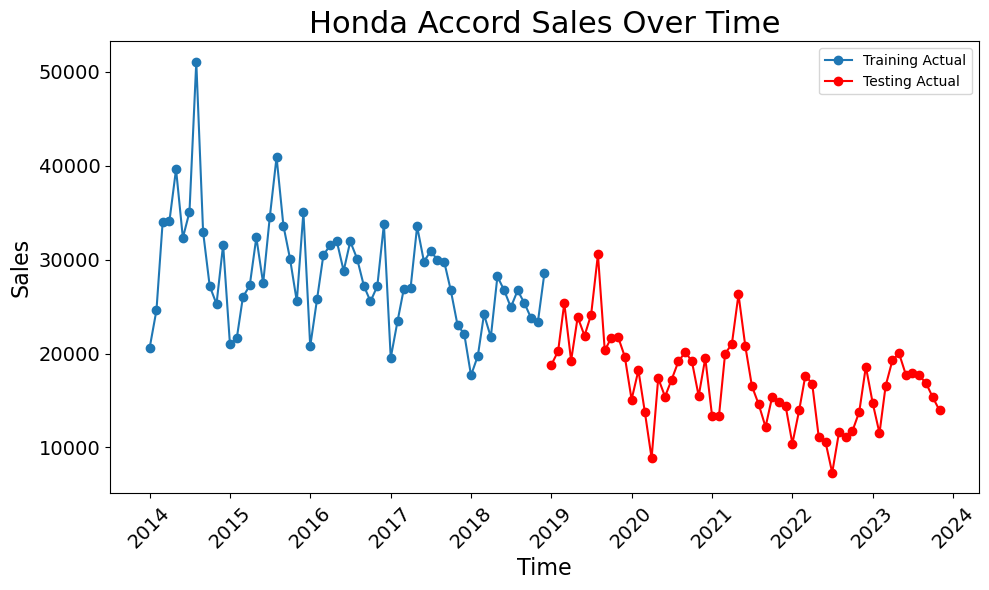

In [101]:
# Concatenate the training and testing data along with their predictions
time_series_train = pd.to_datetime(Accord_train_data['Year'].astype(str) + '-' + Accord_train_data['MonthNumeric'].astype(str))
time_series_test = pd.to_datetime(Accord_test_data['Year'].astype(str) + '-' + Accord_test_data['MonthNumeric'].astype(str))

# Plot actual and predicted sales for both training and testing data
plt.figure(figsize=(10, 6))

# Training data
plt.plot(time_series_train, Accord_train_data['AccordSales'], label='Training Actual', marker='o')

# Testing data
plt.plot(time_series_test, Accord_test_data['AccordSales'], label='Testing Actual', marker='o', color='red')

plt.title('Honda Accord Sales Over Time', fontsize=22)  # Set title font size
plt.xlabel('Time', fontsize=16)  # Set x-axis label font size
plt.ylabel('Sales', fontsize=16)  # Set y-axis label font size

plt.legend()
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()